In [1]:
# https://colab.research.google.com/drive/1CpV4osCtZdmtnDStA4qrYjIAlWnTjtVK?usp=sharing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/abdulla/Character/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/abdulla/Character/anotation_28x28/Train.csv .

!rm -rf sample_data

Mounted at /content/drive


In [4]:
import pandas as pd 
import seaborn as sns

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     6000
26    5999
20    5999
21    5999
22    5999
23    5999
24    5999
25    5999
27    5999
18    5999
28    5999
29    5999
30    5999
31    5999
32    5999
33    5999
19    5999
17    5999
1     5999
8     5999
2     5999
3     5999
4     5999
5     5999
6     5999
7     5999
9     5999
16    5999
10    5999
11    5999
12    5999
13    5999
14    5999
15    5999
34    5999
Name: label, dtype: int64

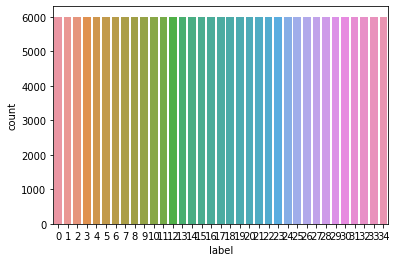

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [6]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [9]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [14]:
from keras.utils import to_categorical

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 35)

In [15]:
from sklearn.model_selection import train_test_split

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(Y_train, num_classes = 35, dtype = 'float32')
y_test = to_categorical(Y_val, num_classes = 35, dtype = 'float32')

In [17]:
y_train.shape

(170072, 35, 35)

In [18]:
# # # Reshaping the array to include the RGB value. Here RGB value is 1 since it is a b&w image

# x_train = X_train.values.reshape(-1,28,28,1)
# x_test = X_val.values.reshape(-1,28,28,1)

In [19]:
# Converting the arrays to float so that we can get decimal points after division
x_train = X_train.astype('float32')
x_test = X_val.astype('float32')

In [20]:
# Normalizing the RGB codes by dividing it to the maximum RGB value.
x_train /= 255
x_test /= 255

In [21]:
#Checking the shapes of x_train and y_train 
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (170072, 28, 28, 1)
y_train shape: (170072, 35, 35)
Number of images in x_train 170072
Number of images in x_test 18897


In [22]:
#Initializing the input shape
input_shape = (28, 28, 1)

In [24]:
import tensorflow as tf
from tensorflow import keras

# load the data
X_train, X_val, Y_train, Y_val

# (train_img,train_label),(test_img,test_label) = keras.datasets.mnist.load_data()
# train_img = train_img.reshape([-1, 28, 28, 1])
# test_img = test_img.reshape([-1, 28, 28, 1])
# train_img = train_img/255.0
# test_img = test_img/255.0
# train_label = keras.utils.to_categorical(train_label)
# test_label = keras.utils.to_categorical(test_label)

# define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(35, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x=X_train,y=Y_train, epochs=30)
model.evaluate(X_val, Y_val)
model.evaluate(X_train, Y_train)

Epoch 1/30
5315/5315 [==============================] - 35s 5ms/step - loss: 0.4619 - accuracy: 0.8517
Epoch 2/30
5315/5315 [==============================] - 24s 4ms/step - loss: 0.2044 - accuracy: 0.9346
Epoch 3/30
5315/5315 [==============================] - 25s 5ms/step - loss: 0.1578 - accuracy: 0.9497
Epoch 4/30
5315/5315 [==============================] - 25s 5ms/step - loss: 0.1356 - accuracy: 0.9578
Epoch 5/30
5315/5315 [==============================] - 25s 5ms/step - loss: 0.1189 - accuracy: 0.9633
Epoch 6/30
5315/5315 [==============================] - 25s 5ms/step - loss: 0.1115 - accuracy: 0.9665
Epoch 7/30
5315/5315 [==============================] - 25s 5ms/step - loss: 0.1090 - accuracy: 0.9686
Epoch 8/30
5315/5315 [==============================] - 24s 5ms/step - loss: 0.1064 - accuracy: 0.9708
Epoch 9/30
5315/5315 [==============================] - 24s 5ms/step - loss: 0.1042 - accuracy: 0.9724
Epoch 10/30
5315/5315 [==============================] - 25s 5ms/step - l

[0.05595627427101135, 0.9924561381340027]

In [25]:
model.save("model.h5")

In [ ]:
!cp -r /content/drive/MyDrive/abdulla/Number/ .